# 📘 Kombinert analyse av Frost API og NILU API

Denne notebooken undersøker hvordan ulike værforhold påvirker luftkvaliteten i Norge, med særlig fokus på temperatur og vindhastighet i sammenheng med konsentrasjoner av NO₂ (nitrogendioksid) og O₃ (ozon).

Vi kombinerer tidligere presenterte målinger fra to miljøedatakilder:
- **Frost API** - værdata fra Meterologisk institutt 
- **NILU API** - luftkvalitetsdata fra NOrsk institutt for luftforskning.

Formålet er å analysere hvordan meterologiske faktorer kan påvirke luftforurensningen, og om det finnes tydelige mønstre eller korrelasjoner som kan visualiseres og tolkes. 

#### Mål for analysen:
- Kombinere meteorlogiske og luftkvalitetsdata 
- Visualisere samvariasjon mellom temperatur og NO₂ over tid
- Utføre korrelasjonsanalyse mellom:
    - Temperatur og O₃ 
    - Vindhastighet og NO₂
- Tolke resultatene i lys av kjente meteorologiske og miljømessige forhold


----------------------------------------------------------------

In [1]:
#Filbane 
import sys
sys.path.insert(0, '../src/')

## Visualisering av sammenhengen mellom luftkvalitet og temperatur

#### Introduksjon til datasettet og visualiseringen

Denne koden leser inn to miljødatakilder:
- Meteorologiske data (temperatur) fra Meteorologisk institutt (Frost API)
- Luftkvalitetsmålinger (NO₂) fra Norsk institutt for luftforskning (NILU)

Begge datasettene inneholder en `Dato`-kolonne og kombineres gjennom en **indre join**, slik at kun datoer med data i begge kilder benyttes. Den resulterende datastrukturen benyttes til å visualisere **temperatur** og **NO₂-konsentrasjon** over tid i én felles graf med to y-akser.

#### Formål og nytteverdi

Denne typen visualisering gir en oversikt over hvordan temperatur og luftforurensning (her representert ved nitrogendioksid – NO₂) utvikler seg over tid, og legger til rette for å identifisere mulige sammenhenger mellom meteorologiske forhold og luftkvalitet.

Spesielt er det nyttig å undersøke:
- Sesongvariasjoner i luftforurensning
- Samvariasjon mellom kaldt vær og forhøyede NO₂-nivåer
- Trender og avvik som kan indikere behov for tiltak eller videre analyser

#### Hvorfor er NO₂ ofte høyere ved lavere temperaturer?

Ved kalde temperaturer – spesielt om vinteren – forekommer det ofte meteorologiske fenomener som **temperaturinversjon**. Dette skjer når et kaldt luftlag nær bakken fanges under et varmere luftlag høyere oppe. Inversjonen fungerer som et **lokk** som hindrer vertikal sirkulasjon i atmosfæren, og forurensning fra biltrafikk og annen forbrenning får ikke anledning til å spre seg eller løftes bort.

Konsekvensene av dette inkluderer:
- Akkumulering av NO₂ og andre forurensende stoffer nær bakkenivå
- Dårligere luftkvalitet i befolkningstette områder, spesielt i byer og dalfører
- Økt helserisiko, spesielt for utsatte grupper som barn, eldre og personer med luftveissykdommer

Ved å sammenligne NO₂ og temperatur visuelt i én graf, blir det lettere å identifisere slike mønstre og forstå **hvordan værforhold påvirker luftforurensningen**.

#### Fordeler ved valgt visualiseringsmetode

- Bruk av to y-akser muliggjør en **intuitiv og presis sammenligning** mellom to dataserier med ulik skala.
- Tidslinjeformatet gir god **oversikt over utvikling og sesongvariasjon**.
- Bruk av farge og interaktive elementer gjør grafen **lett å lese og tolke**, også for ikke-eksperter.

Denne typen fremstilling er et nyttig verktøy for både forskere, forvaltningsorgan og beslutningstakere som arbeider med klima, byplanlegging eller folkehelse.


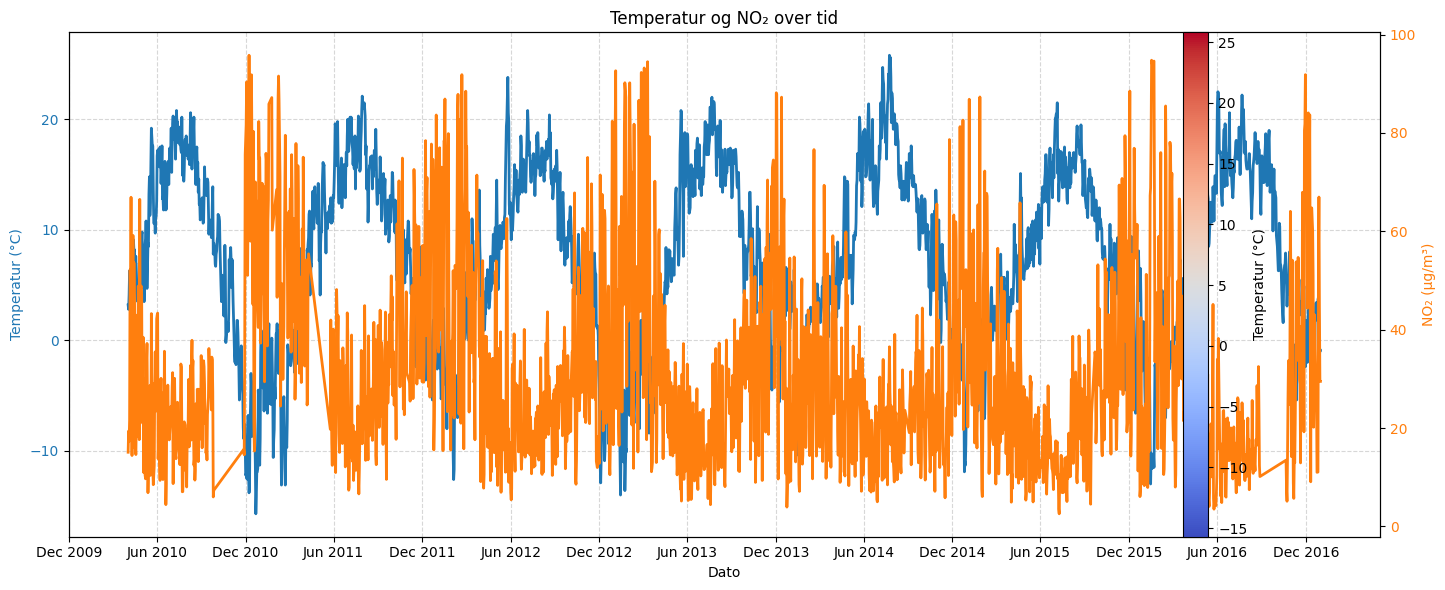

In [9]:
from kombinert_analyse import load_merge_and_plot_no2_temp
load_merge_and_plot_no2_temp()


---
## Videre analyse: Temperatur og O₃, Vindhastighet og NO₂

Vi går videre med en korrelasjonsanalyse for å undersøke hvorvidt det finnes statistiske sammenhenger mellom:
- Temperatur og ozon (O₃) 
- Vindhastighet og nitrogendioksid (NO₂) 

Målet er å kvantifisere og visualisere hvordan disse meteorologiske faktorene påvirker luftkvaliteten. 

##### <u>Korrelasjonsanalyse med Pearson-koeffisienten</u>:

Resultater fra beregningen viser:

| Variabelpar              | Pearson-korrelasjon |
|--------------------------|---------------------|
| Temperatur og O₃         | 0,315               |
| Vindhastighet og NO₂     | -0,56               |


##### <u>Tolkning</u>:

En korrelasjon på **0,315** tilsier en moderat positiv sammenheng mellom temperatur og ozon-nivå. Funnet tilsier at ozon dannes lettere på varme dager. Årsaken til dette er at ozon ved bakkeplan dannes gjennom fotokjemiske reaksjoner drevet av sollys. På solrike, varmedager, spesielt i urbane områder med mye trafikk, kan altså bakkenært ozon nå høye konsentrasjoner. 

En korrelasjon på **-0,56** tilsier en moderat til sterk negativ sammenheng. Funnet tilsier at vind bidrar til å spre forurensning (spesielt NO2) og det er derfor lavere konsentrasjoner lokalet ved høy vindhastighet. 

*Disse funnene er i tråd med forventede meteorologiske effekter.*

##### <u>Visualisering</u>:

Scatterplottet viser korrelassjonsfunnene visuelt:
- Scatterplottet for temperatur og ozon viser en tendens til høyere ozon-nivå ved høyere temperatur. 
- Scatterplottet for vindhastighet og NO2 viser en negativ trend hvor høyere vind gir lavere NO2. 


Korrelasjon mellom Temperatur og Verdi_O3: 0.3158373125936069
Korrelasjon mellom Vindhastighet og Verdi_NO2: -0.5600926726837975


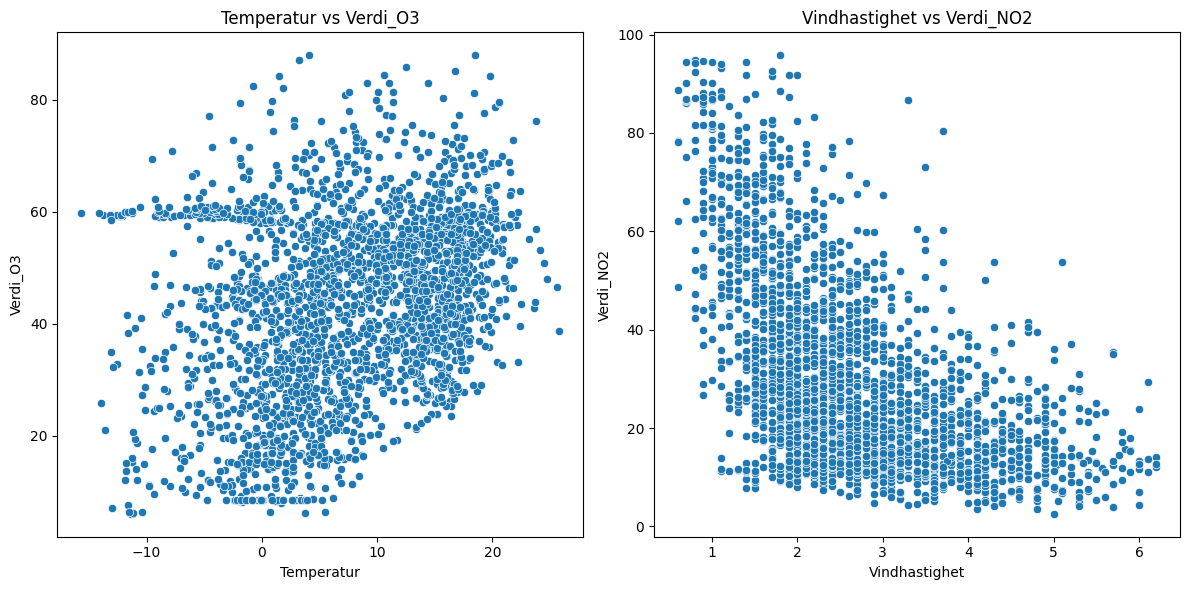

In [10]:
# Beregner og visualiserer korrelasjonen mellom ulike værdata  
from sql_analysis import analyze_frost_nilu
analyze_frost_nilu()

---
## Konklusjon av kombinert analyse

Den kombinerte analysen viser at det finnes målbare sammenhenger mellom vær og luftkvalitet:
- **Kaldt vær** (inversjoner) fører til opphopning av NO₂
- **Høye temperaturer** gir økt ozonproduksjon
- **Vind** spiller en viktig rolle i å redusere lokal luftforurensning

Kombinasjonen av datakilder og visualisering gir verdifull innsikt som kan bidra til bedre luftkvalitetsvarsling, planlegging av tiltak, og informert politikk innen miljø og helse.

---
[⬅️ Forrige: NILU-analyse](niluAPI/niluAPI.ipynb)

Predektiv analyse av dataen
her blir datasettene osm ligger i analysert data brukes. da dette er data som både er standariseret og skjevhetsbehandlet med yeo jhonshon metoden. dette grunnet at settet hadde både negative og positive verdier

Her kombineres datasettene fra nilu og frost på koblinspunktet dato. her blir det gjort om til et flatt datasett som videre blir brukt i den predektive analuysen

In [11]:
sys.path.insert(0, '../src/')
from kombinert_analyse import kombinere_df
data=kombinere_df("../data/analyzed_data/frostAPI_analyzed_data.json", 
                  "../data/analyzed_data/niluAPI_analyzed_data.json", 'Dato')
print(data.head())

        Dato    Nedbør  Temperatur  Vindhastighet  Interpolert_Nedbør  \
0 2010-04-02  1.623820   -0.531761       0.202376               False   
1 2010-04-03  1.267506   -0.582103      -0.341805               False   
2 2010-04-04 -0.818391   -0.418491       0.837255               False   
3 2010-04-05 -0.818391   -0.141610      -0.251108               False   
4 2010-04-06 -0.818391   -0.506590      -1.067380               False   

   Interpolert_Temperatur  Interpolert_Vindhastighet  Dekningsgrad_NO2  \
0                   False                      False             100.0   
1                   False                      False             100.0   
2                   False                      False             100.0   
3                   False                      False             100.0   
4                   False                      False             100.0   

   Dekningsgrad_O3  Dekningsgrad_SO2  Verdi_NO2_Trans  Verdi_O3_Trans  \
0            100.0             100.0       

In [12]:
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
sys.path.insert(0, '../src/')
from kombinert_analyse import prediksjon_med_fremtidige_verdier
features = ["Nedbør", "Temperatur", "Vindhastighet", "måned", "ukedag", "sin_dag", "cos_dag"]

In [13]:

prediksjon_med_fremtidige_verdier(df=data, target_col="Verdi_NO2_Trans", features=features, model_objekt=LGBMRegressor(), 
                                  antall_dager=500, dekningsgrad=data["Dekningsgrad_NO2"])         
prediksjon_med_fremtidige_verdier(df=data, target_col="Verdi_NO2_Trans", features=features, model_objekt=LinearRegression(), 
                                  antall_dager=500, dekningsgrad=data["Dekningsgrad_NO2"])



🔍 Evaluering av modellen 'LGBMRegressor'for 'Verdi_NO2_Trans' (på testdata):
- R²-score: 0.6020
- MSE: 0.4725



🔍 Evaluering av modellen 'LinearRegression'for 'Verdi_NO2_Trans' (på testdata):
- R²-score: 0.5817
- MSE: 0.4966


In [14]:
prediksjon_med_fremtidige_verdier(df=data, target_col="Verdi_SO2_Trans", features=features, model_objekt=LGBMRegressor(), 
                                  antall_dager=500, dekningsgrad=data["Dekningsgrad_SO2"])         
prediksjon_med_fremtidige_verdier(df=data, target_col="Verdi_SO2_Trans", features=features, model_objekt=LinearRegression(), 
                                  antall_dager=500, dekningsgrad=data["Dekningsgrad_SO2"])


🔍 Evaluering av modellen 'LGBMRegressor'for 'Verdi_SO2_Trans' (på testdata):
- R²-score: -1.1162
- MSE: 0.8565



🔍 Evaluering av modellen 'LinearRegression'for 'Verdi_SO2_Trans' (på testdata):
- R²-score: -0.7804
- MSE: 0.7206


In [15]:
prediksjon_med_fremtidige_verdier(df=data, target_col="Verdi_O3_Trans", features=features, model_objekt=LGBMRegressor(), 
                                  antall_dager=500, dekningsgrad=data["Dekningsgrad_O3"])         
prediksjon_med_fremtidige_verdier(df=data, target_col="Verdi_O3_Trans", features=features, model_objekt=LinearRegression(), 
                                  antall_dager=500, dekningsgrad=data["Dekningsgrad_O3"])


🔍 Evaluering av modellen 'LGBMRegressor'for 'Verdi_O3_Trans' (på testdata):
- R²-score: -0.0615
- MSE: 0.9168



🔍 Evaluering av modellen 'LinearRegression'for 'Verdi_O3_Trans' (på testdata):
- R²-score: 0.1036
- MSE: 0.7742


In [2]:
from kombinert_analyse import vis_koeffisienter_linærmodell
features = ["Nedbør", "Temperatur", "Vindhastighet", "måned", "ukedag", "sin_dag", 
            "cos_dag","Verdi_NO2_Trans", "Verdi_O3_Trans", "Verdi_SO2_Trans"]
vis_koeffisienter_linærmodell(data, features, ["Verdi_NO2_Trans", "Verdi_O3_Trans", "Verdi_SO2_Trans"])

ModuleNotFoundError: No module named 'kombinert_analyse'

### 📊 *Kort oppsummering av modellkoeffisienter*

---

#### Verdi_NO2_Trans (Nitrogendioksid)
- **↑** Øker tydelig om vinteren 
- **↑** Samvarierer med SO₂ 
- **↓** Reduseres av høy vindhastighet
- Svake effekter fra temperatur, O₃, nedbør og ukedager  

---

#### Verdi_O3_Trans (Ozon) 
- **↑** Øker tydelig på våren/sommeren 
- Sterkt sesongavhengig – lite påvirket av andre variabler  

---

#### Verdi_SO2_Trans (Svoveldioksid)
- **↑** Samvarierer sterkt med NO₂ 
- **↑** Øker med `sin_dag` (sesong), svakt med O₃ og ukedag  
- **↓** Reduseres av temperatur, vind og vinter 

---

#### cos_dag generelt:
- Positiv for NO₂ → mer NO₂ om vinteren  
- Negativ for SO₂ og O → disse reduseres vinterstid  


In [ ]:
from kombinert_analyse import vis_polynomregresjon_for_feature


In [ ]:
vis_polynomregresjon_for_feature(df=data,feature="Vindhastighet", target_col="Verdi_NO2_Trans")
vis_polynomregresjon_for_feature(df=data,feature="cos_dag", target_col="Verdi_NO2_Trans")
vis_polynomregresjon_for_feature(df=data,feature="Verdi_SO2_Trans", target_col="Verdi_NO2_Trans")

### NO₂ – polynomregresjon
Basert på tidligere analyser er Vindhastighet, cos_dag og SO₂ valgt som forklaringsvariabler for NO₂.

##### Vindhastighet → NO₂
Sterk negativ sammenheng.
R² øker fra 0.33 til 0.37 når man bruker høyere grads polynom.
Dette tyder på at forholdet er delvis ikke-lineært, men negativt totalt sett.

##### cos_dag → NO₂
Tydelig positiv sammenheng.
R² holder seg rundt 0.24 for alle grader → i hovedsak lineært forhold.
Støtter at NO₂ øker vinterstid.

##### SO₂ → NO₂
Klar positiv sammenheng.
R² ~0.26 for alle grader, med liten gevinst av mer komplekse modeller.
Indikerer at sammenhengen er stabil og lineær.

##### Konklusjon:
Vindhastighet har sterk negativ effekt, og kan forklares bedre med et ikke-lineært uttrykk.
cos_dag og SO₂ har lineær og positiv påvirkning, og gir god forklaring på variasjonen i NO₂.
NO₂ ser dermed ut til å øke vinterstid (cos_dag) og med høyere SO₂, men falle ved økt vind.

In [ ]:
vis_polynomregresjon_for_feature(df=data,feature="Verdi_NO2_Trans", target_col="Verdi_SO2_Trans")
vis_polynomregresjon_for_feature(df=data,feature="Temperatur", target_col="Verdi_SO2_Trans")

### SO₂ – polynomregresjon

Basert på tidligere analyser er NO₂ og Temperatur valgt som sentrale forklaringsvariabler.

##### NO₂ → SO₂
Klar positiv og lineær sammenheng.
R² ligger stabilt rundt 0.26–0.27 for alle polynomgrader.
Lite forbedring ved høyere grad → forholdet er i hovedsak lineært.
##### Temperatur → SO₂
Svak negativ og noe ikke-lineær sammenheng.
R² forbedres noe (fra 0.11 til 0.13) ved å øke graden.
Tyder på en svak kurveformet effekt, men lav forklaringskraft totalt sett.

##### Konklusjon:

SO₂ påvirkes mest av NO₂, i et nær lineært forhold.
Temperatur gir svak prediksjon, og effekten er delvis ikke-lineær.

In [ ]:
vis_polynomregresjon_for_feature(df=data,feature="Temperatur", target_col="Verdi_O3_Trans")
vis_polynomregresjon_for_feature(df=data,feature="cos_dag", target_col="Verdi_O3_Trans")

### O₃ – polynomregresjon
Basert på tidligere analyser ble Temperatur og cos_dag valgt som forklaringsvariabler for O₃.

##### Temperatur → O₃
Viser svak positiv sammenheng.
R² øker noe med høyere grad (fra 0.099 til 0.111), som antyder en svak ikke-lineær effekt, men med begrenset forklaringsevne totalt sett.

##### cos_dag → O₃
Tydelig negativ sammenheng.
R² forbedres svakt med økende grad, men ligger stabilt rundt 0.21.
Indikerer en stabil og delvis ikke-lineær effekt gjennom året.

##### Konklusjon:
cos_dag er best egnet for å modellere sesongvariasjoner i ozon.
Temperatur har en viss effekt, men gir lav forklaringskraft.
Dette styrker antakelsen om lavere ozonverdier vinterstid, hovedsakelig fanget opp av cos_dag.